In [2]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df= pd.read_csv("/content/glass.csv")

df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#independent and dependent features

X = df.iloc[:, 0:-1]
Y = df.iloc[:,-1]

In [5]:
kfold = KFold(n_splits=10)

In [6]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

In [7]:
results

array([0.5       , 0.81818182, 0.72727273, 0.90909091, 0.19047619,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [8]:
print(results.mean())

0.42878787878787883


### Grid Search for Algorithm Tuning

In [9]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [11]:
df= pd.read_csv("/content/glass.csv")
X = df.iloc[:, 0:-1]
Y = df.iloc[:,-1]

In [12]:
n = np.array(range(1,40)) # k value from 1 to 40
params = dict(n_neighbors=n)

In [13]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


### Visualizing the CV results

In [15]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 40)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

0     0.650216
2     0.650216
3     0.645455
4     0.645455
21    0.641991
5     0.641126
18    0.637013
17    0.632468
27    0.632468
25    0.632468
23    0.632468
19    0.632468
26    0.627922
20    0.627706
29    0.627706
28    0.627706
6     0.627056
22    0.623160
30    0.622944
1     0.622511
24    0.618615
16    0.618398
15    0.618182
7     0.617965
32    0.613636
31    0.613636
9     0.613636
13    0.613636
36    0.613420
12    0.609091
11    0.608874
33    0.608874
34    0.604113
35    0.604113
14    0.604113
38    0.599351
8     0.594805
37    0.590043
10    0.589827
dtype: float64

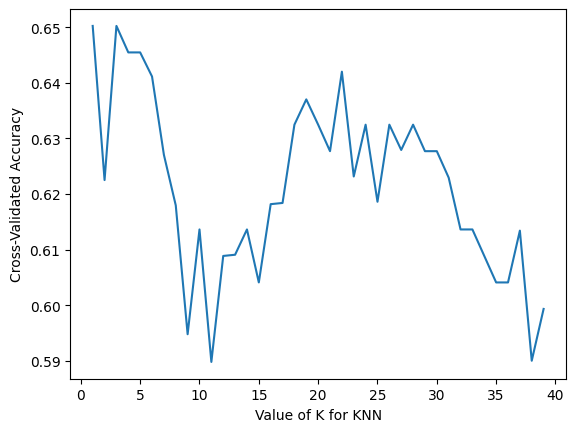

In [16]:
import matplotlib.pyplot as plt

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()